In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from numpy import ndarray

Functions

In [3]:
def square(x: ndarray):
    return np.power(x, 2)

def leaky_relu(x: ndarray):
    return np.where(x >=0, x, x*0.2)

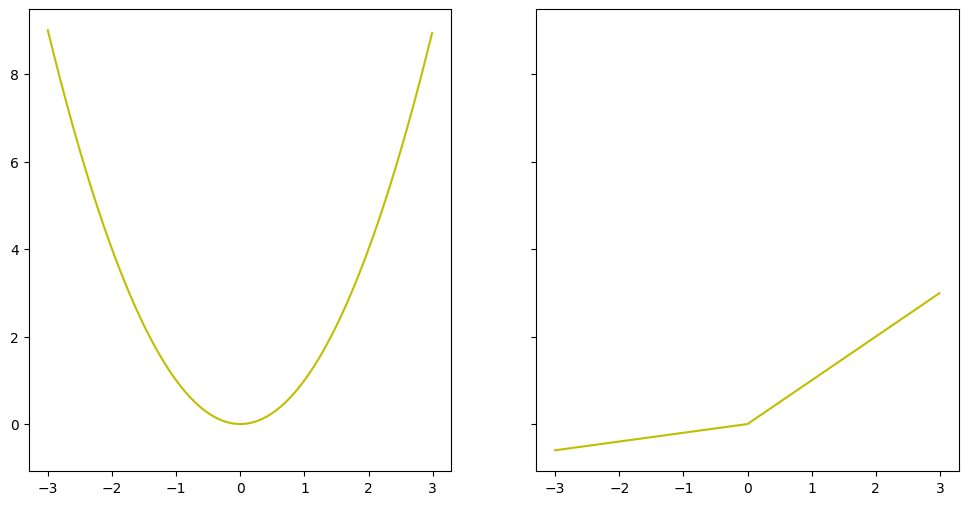

In [9]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12,6))
x = np.arange(-3,3,0.01)
squared = square(x)
relued = leaky_relu(x)

ax[0].plot(x, squared, c='y')
ax[1].plot(x, relued, c='y')

plt.show()

Derivatives

In [10]:
from typing import Callable
def deriv(func: Callable[[ndarray], ndarray],
        input_, 
        delta: float = 0.0001):
    numerator = func(input_ + delta) - func(input_ - delta)
    denominator = 2 * delta 
    derivative = numerator / denominator 
    return derivative 

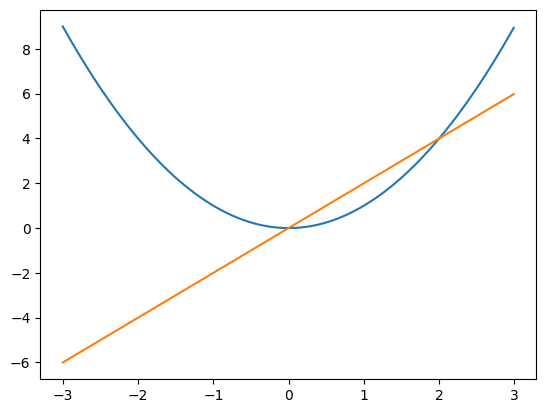

In [11]:
input_ = np.arange(-3, 3, 0.01)
squared = square(input_)
derivatives = deriv(square, input_)

plt.plot(input_, squared)
plt.plot(input_, derivatives)

plt.show()

# Nested Functions

In [13]:
from typing import List 
Array_function = Callable[[ndarray], ndarray]
Chain = List[Array_function]

def chained_output(chain: Chain, input_range: ndarray):
    output = input_range 
    for func in chain: 
        output = func(output)
    
    return output

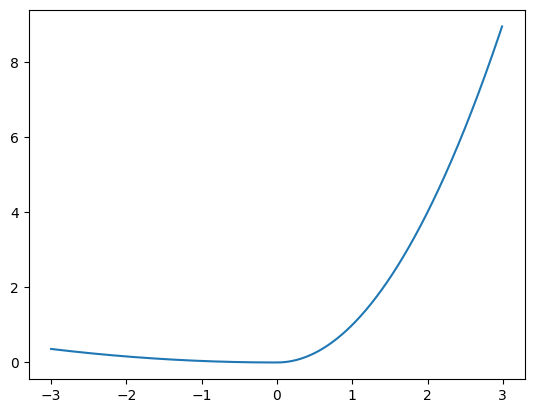

In [15]:
chain = [leaky_relu, square]
input_range = np.arange(-3,3, 0.01)
chain_output = chained_output(chain, input_range)

plt.plot(input_range, chain_output)
plt.show()

# chain rule

In [16]:
def chain_rule(chain: Chain, input_range: ndarray):
    derivatives = []
    x = input_range 
    for func in chain:
        derivatives.append(deriv(func, x))
        y = func(x)
        x = y 
    
    derivatives = np.prod(np.array(derivatives), axis=0)
    return derivatives

In [21]:
def plot_chain(ax, chain: Chain, input_range: ndarray):
    x = input_range 
    y = chained_output(chain, x)

    ax.plot(x, y)
    ax.legend()

def plot_chain_deriv(ax, chain: Chain, input_range: ndarray):
    x = input_range 
    y = chain_rule(chain, x) 

    ax.plot(x, y)
    ax.legend()

In [19]:
def sigmoid(x: ndarray):
    return 1 / (1 + np.exp(-x))

/tmp/ipykernel_30728/3410529773.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/tmp/ipykernel_30728/3410529773.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


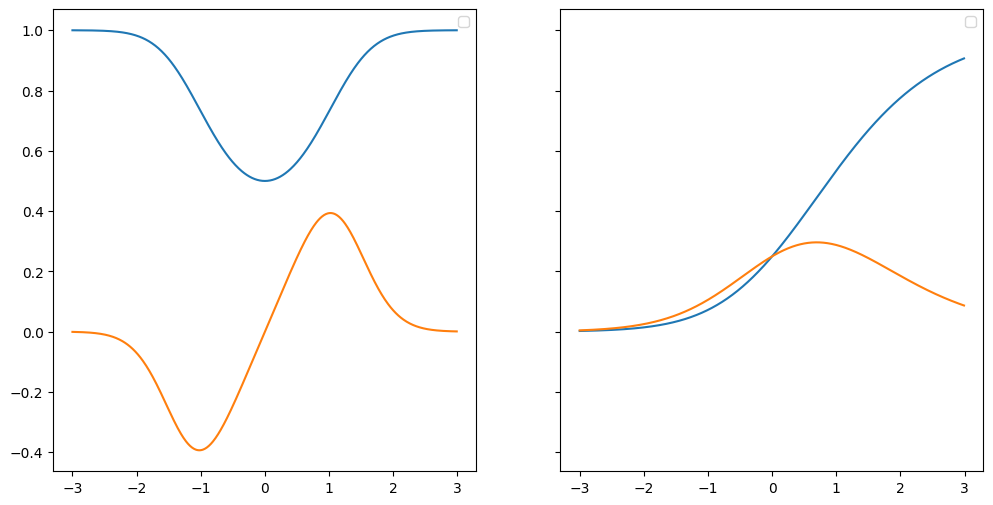

In [23]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12,6))
chain_1 = [square, sigmoid]
chain_2 = [sigmoid, square]

input_range = np.arange(-3,3, 0.01)

plot_chain(ax[0], chain_1, input_range)
plot_chain_deriv(ax[0], chain_1, input_range)

plot_chain(ax[1], chain_2, input_range)
plot_chain_deriv(ax[1], chain_2, input_range)

plt.show()

/tmp/ipykernel_30728/3410529773.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/tmp/ipykernel_30728/3410529773.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


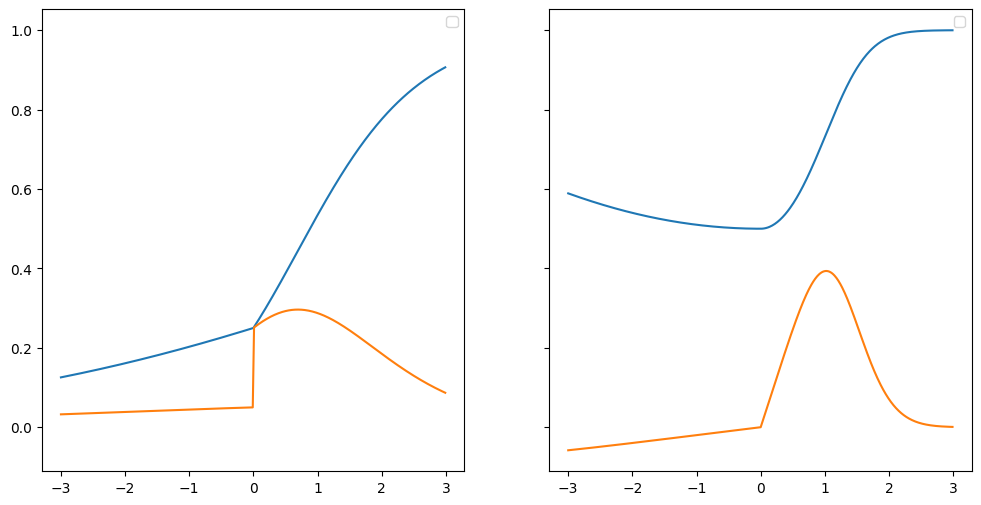

In [24]:
fig, ax = plt.subplots(1,2,sharey=True, figsize=(12,6))
PLOT_RANGE = np.arange(-3,3,0.01)
chain_1 = [leaky_relu, sigmoid, square]
chain_2 = [leaky_relu, square, sigmoid]

plot_chain(ax[0], chain_1, PLOT_RANGE)
plot_chain_deriv(ax[0], chain_1, PLOT_RANGE)


plot_chain(ax[1], chain_2, PLOT_RANGE)
plot_chain_deriv(ax[1], chain_2, PLOT_RANGE)

plt.show()

# Multiple inputs

In [25]:
def multiple_inputs_add(x: ndarray, 
                        y: ndarray, 
                        sigma: Array_function):
    assert x.shape == y.shape
    a = x + y 
    return sigma(a)

In [ ]:
def multiple_inputs_add_deriv(x: ndarray, 
                              y: ndarray, 
                              sigma: Array_function) -> float:
    a = x + y 
    dsda = deriv(sigma, a)

    dadx, dady = 1, 1 

    return dsda * dadx, dsda * dady 


In [33]:
x = np.arange(1,6)
y = np.ones((5,))*2 

def sigma(a: ndarray):
    return np.power(a, 2) 

multiple_inputs_add_deriv(x, y, sigma)

(array([ 6.,  8., 10., 12., 14.]), array([ 6.,  8., 10., 12., 14.]))

In [35]:
from typing import Tuple
def multiple_inputs_multiply(x: ndarray, y:ndarray, sigma: Array_function):
    a = x * y 
    return sigma(a)

def multiple_inputs_multiply_deriv(x: ndarray, 
                             y: ndarray, 
                             sigma: Array_function) -> Tuple[ndarray]:
    a = x * y
    dsda = deriv(sigma, a)
    
    dadx = y 
    dady = x 

    dsdx = dsda * dadx
    dsdy = dsda * dady

    return dsdx, dsdy 


In [38]:
x = np.arange(1,6)
y = np.arange(6,11)

multiple_inputs_multiply_deriv(x, y, square)

(array([  72.        ,  196.        ,  384.        ,  648.00000002,
        1000.00000002]),
 array([ 12.        ,  56.        , 144.        , 288.00000001,
        500.00000001]))

In [39]:
def matmul_forward(X: ndarray,
                   W: ndarray):
    '''
    Computes the forward pass of a matrix multiplication'''

    assert X.shape[0] == W.shape[0] \
    